## Exploratory Data Analysis (EDA)

In [1]:
import sys
sys.path.append("..")

import module.utils.general_utils as general_utils
import module.utils.data_prepare_utils as data_prepare_utils
import module.utils.eda_utils as eda_utils

#### Sample a fraction of train dataset for exploration

In [2]:
target = "label"

In [3]:
train_df = general_utils.read_csv("../data/train_df.csv")


Read CSV file ../data/train_df.csv into DataFrame:
df.head(): 


,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
0,1678291,2267,4548,3,160,58,5,14,79,41,...,4,20,1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,42,4,0
1,1528768,2325,4456,6,139,60,3,17,78,23,...,5,20,-1,-1,2,2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^...,12,38,6,0
2,1348183,5666,6738,7,175,60,4,12,34,13,...,3,-1,-1,-1,2,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,12,24,5,0
3,1044095,4005,3013,7,150,17,5,11,11,39,...,5,-1,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,36,7,0
4,1772654,2877,3520,7,147,29,5,16,86,37,...,5,-1,-1,-1,2,2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^...,12,17,3,0


df.shape: (33525706, 36)


In [4]:
train_df_eda = data_prepare_utils.sample_data(train_df, fraction=0.01)
del train_df


Sample 0.01 fraction from DataFrame:
sample_df.shape: (335257, 36)


#### Describe basic information of attributes 

In [5]:
eda_utils.check_out_general_info(train_df_eda)


General information of DataFrame:
df.shape:
(335257, 36)
df.head():


uid  task_id  adv_id  creat_type_cd  adv_prim_id  dev_id  \
label                                                                          
0     10891243  1515750     5602    6503              7          207      17   
      29833678  2054132     5404    1303              6          170      60   
      15726933  1818477     2325    4456              6          139      60   
      18249101  1551507     5557    3110              7          214      36   
      13480351  1327033     1813    5657              6          118      60   

                inter_type_cd  slot_id  spread_app_id  tags  ...  \
label                                                        ...   
0     10891243              5       12             13    37  ...   
      29833678              3       17             29    23  ...   
      15726933              3       16             78    23  ...   
      18249101              5       12             80    41  ...   
      13480351              3       18             67    19  ...   

                device_price  up_life_duration  up_membership_grade  \
label                                                                 
0     10891243             3                 2                   -1   
      29833678             4                18                   -1   
      15726933             5                20                   -1   
      18249101             4                -1                   -1   
      13480351             2                20                   -1   

                membership_life_duration  consume_purchase  \
label                                                        
0     10891243                        -1                 2   
      29833678                        -1                10   
      15726933                        -1                10   
      18249101                        -1                 2   
      13480351                        -1                 5   

                                         communication_onlinerate  \
label                                                               
0     10891243                      14^15^16^17^18^19^20^21^22^23   
      29833678  1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^1...   
      15726933  2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^...   
      18249101  4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^2...   
      13480351  6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23   

                communication_avgonline_30d  indu_name  pt_d  label  
label                                                                
0     10891243                            9         17     1      0  
      29833678                           12         40     2      0  
      15726933                           12         38     5      0  
      18249101                           11         42     4      0  
      13480351                           10         34     7      0  

[5 rows x 36 columns]

df.info:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 335257 entries, (0, 10891243) to (1, 18843641)
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   uid                          335257 non-null  int64 
 1   task_id                      335257 non-null  int64 
 2   adv_id                       335257 non-null  int64 
 3   creat_type_cd                335257 non-null  int64 
 4   adv_prim_id                  335257 non-null  int64 
 5   dev_id                       335257 non-null  int64 
 6   inter_type_cd                335257 non-null  int64 
 7   slot_id                      335257 non-null  int64 
 8   spread_app_id                335257 non-null  int64 
 9   tags                         335257 non-null  int64 
 10  app_first_class              335257 non-null  int64 
 11  app_second_class             335257 non-null  int64 
 12  age                          335257 non-null

None

df.describe: 


,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_avgonline_30d,indu_name,pt_d,label
count,3.352570e+05,335257.000000,335257.000000,335257.000000,335257.000000,335257.000000,335257.000000,335257.000000,335257.000000,335257.000000,...,335257.000000,335257.000000,335257.000000,335257.000000,335257.000000,335257.000000,335257.000000,335257.000000,335257.000000,335257.000000
mean,1.617830e+06,3439.112898,3966.592062,6.490603,159.359694,41.532052,4.648168,15.256982,51.956189,34.368529,...,9.211336,3.474746,12.707371,-0.754994,-0.968806,2.583072,11.144480,26.542285,3.993119,0.034493
std,3.579909e+05,1428.367433,1719.194141,1.230572,30.930926,17.424438,0.708969,3.169083,25.125787,8.148608,...,3.638066,1.159128,9.020866,0.659497,0.764871,1.760222,1.646342,11.053214,2.011216,0.182492
min,1.000003e+06,1001.000000,1004.000000,2.000000,101.000000,11.000000,2.000000,11.000000,11.000000,11.000000,...,-2.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,-1.000000,11.000000,1.000000,0.000000
25%,1.305945e+06,2229.000000,2504.000000,6.000000,134.000000,29.000000,5.000000,12.000000,31.000000,34.000000,...,7.000000,3.000000,-1.000000,-1.000000,-1.000000,2.000000,10.000000,17.000000,2.000000,0.000000
50%,1.617848e+06,3370.000000,4054.000000,7.000000,156.000000,37.000000,5.000000,16.000000,53.000000,37.000000,...,9.000000,4.000000,18.000000,-1.000000,-1.000000,2.000000,11.000000,24.000000,4.000000,0.000000
75%,1.927908e+06,4595.000000,5463.000000,7.000000,182.000000,60.000000,5.000000,17.000000,78.000000,40.000000,...,12.000000,4.000000,20.000000,-1.000000,-1.000000,2.000000,12.000000,36.000000,6.000000,0.000000
max,2.237666e+06,5992.000000,7020.000000,9.000000,214.000000,72.000000,5.000000,22.000000,89.000000,42.000000,...,17.000000,7.000000,20.000000,3.000000,20.000000,10.000000,13.000000,52.000000,7.000000,1.000000


#### Checkout duplicate observations

In [6]:
eda_utils.check_out_missing_target(train_df_eda, target)


Check out observations with missing target:
df.shape:  (335257, 36)
drop_miss_tar_df.shape:  (335257, 36)
No missing-target observations observed in data set.


#### Checkout missing targets

In [7]:
eda_utils.check_out_duplicate_obs(train_df_eda)


Check out duplicate observations:
df.shape:  (335257, 36)
drop_dup_df.shape:  (334590, 36)
Caution: data set contains duplicate observations!!!


#### Checkout missingness

In [8]:
eda_utils.check_out_missingness(train_df_eda)


Check out missingness:
No missing values in data set.


#### Identify numerical and categorical attibutes

In [9]:
numerical_attr_list, nominal_attr_list = eda_utils.split_numerical_nominal_attr(train_df_eda, target)


Split nominal and numerical attr:
numerical_attr_list: 
['uid', 'task_id', 'adv_id', 'creat_type_cd', 'adv_prim_id', 'dev_id', 'inter_type_cd', 'slot_id', 'spread_app_id', 'tags', 'app_first_class', 'app_second_class', 'age', 'city', 'city_rank', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price', 'up_life_duration', 'up_membership_grade', 'membership_life_duration', 'consume_purchase', 'communication_avgonline_30d', 'indu_name', 'pt_d']
nominal_attr_list: 
['communication_onlinerate']


#### Usefulness of attributes for the task

In [10]:
# Calculate the correlatin between each numerical attribute and the target variable
usefulness = eda_utils.corr_target(train_df_eda, target, numerical_attr_list)

In [11]:
usefulness

,Correlation,Variance
uid,0.000016,-2147483648
task_id,0.006378,2040227
adv_id,0.020206,2955619
creat_type_cd,0.008138,1
adv_prim_id,0.035078,956
dev_id,-0.034522,303
inter_type_cd,0.025050,0
slot_id,-0.038840,10
spread_app_id,-0.014550,631
tags,0.030433,66


#### Histogram and basic stats(mean, median, variance, max, min) for numerical attributes

In [12]:
eda_utils.basic_stats(train_df_eda, numerical_attr_list)

,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_avgonline_30d,indu_name,pt_d
count,335257,335257,335257,335257,335257,335257,335257,335257,335257,335257,...,335257,335257,335257,335257,335257,335257,335257,335257,335257,335257
mean,1617829,3439,3966,6,159,41,4,15,51,34,...,19,9,3,12,0,0,2,11,26,3
std,357990,1428,1719,1,30,17,0,3,25,8,...,4,3,1,9,0,0,1,1,11,2
min,1000003,1001,1004,2,101,11,2,11,11,11,...,11,-2,-1,-1,-1,-1,2,-1,11,1
25%,1305945,2229,2504,6,134,29,5,12,31,34,...,14,7,3,-1,-1,-1,2,10,17,2
50%,1617848,3370,4054,7,156,37,5,16,53,37,...,20,9,4,18,-1,-1,2,11,24,4
75%,1927908,4595,5463,7,182,60,5,17,78,40,...,20,12,4,20,-1,-1,2,12,36,6
max,2237666,5992,7020,9,214,72,5,22,89,42,...,28,17,7,20,3,20,10,13,52,7


#### Checkout outliers for numerical attribtues

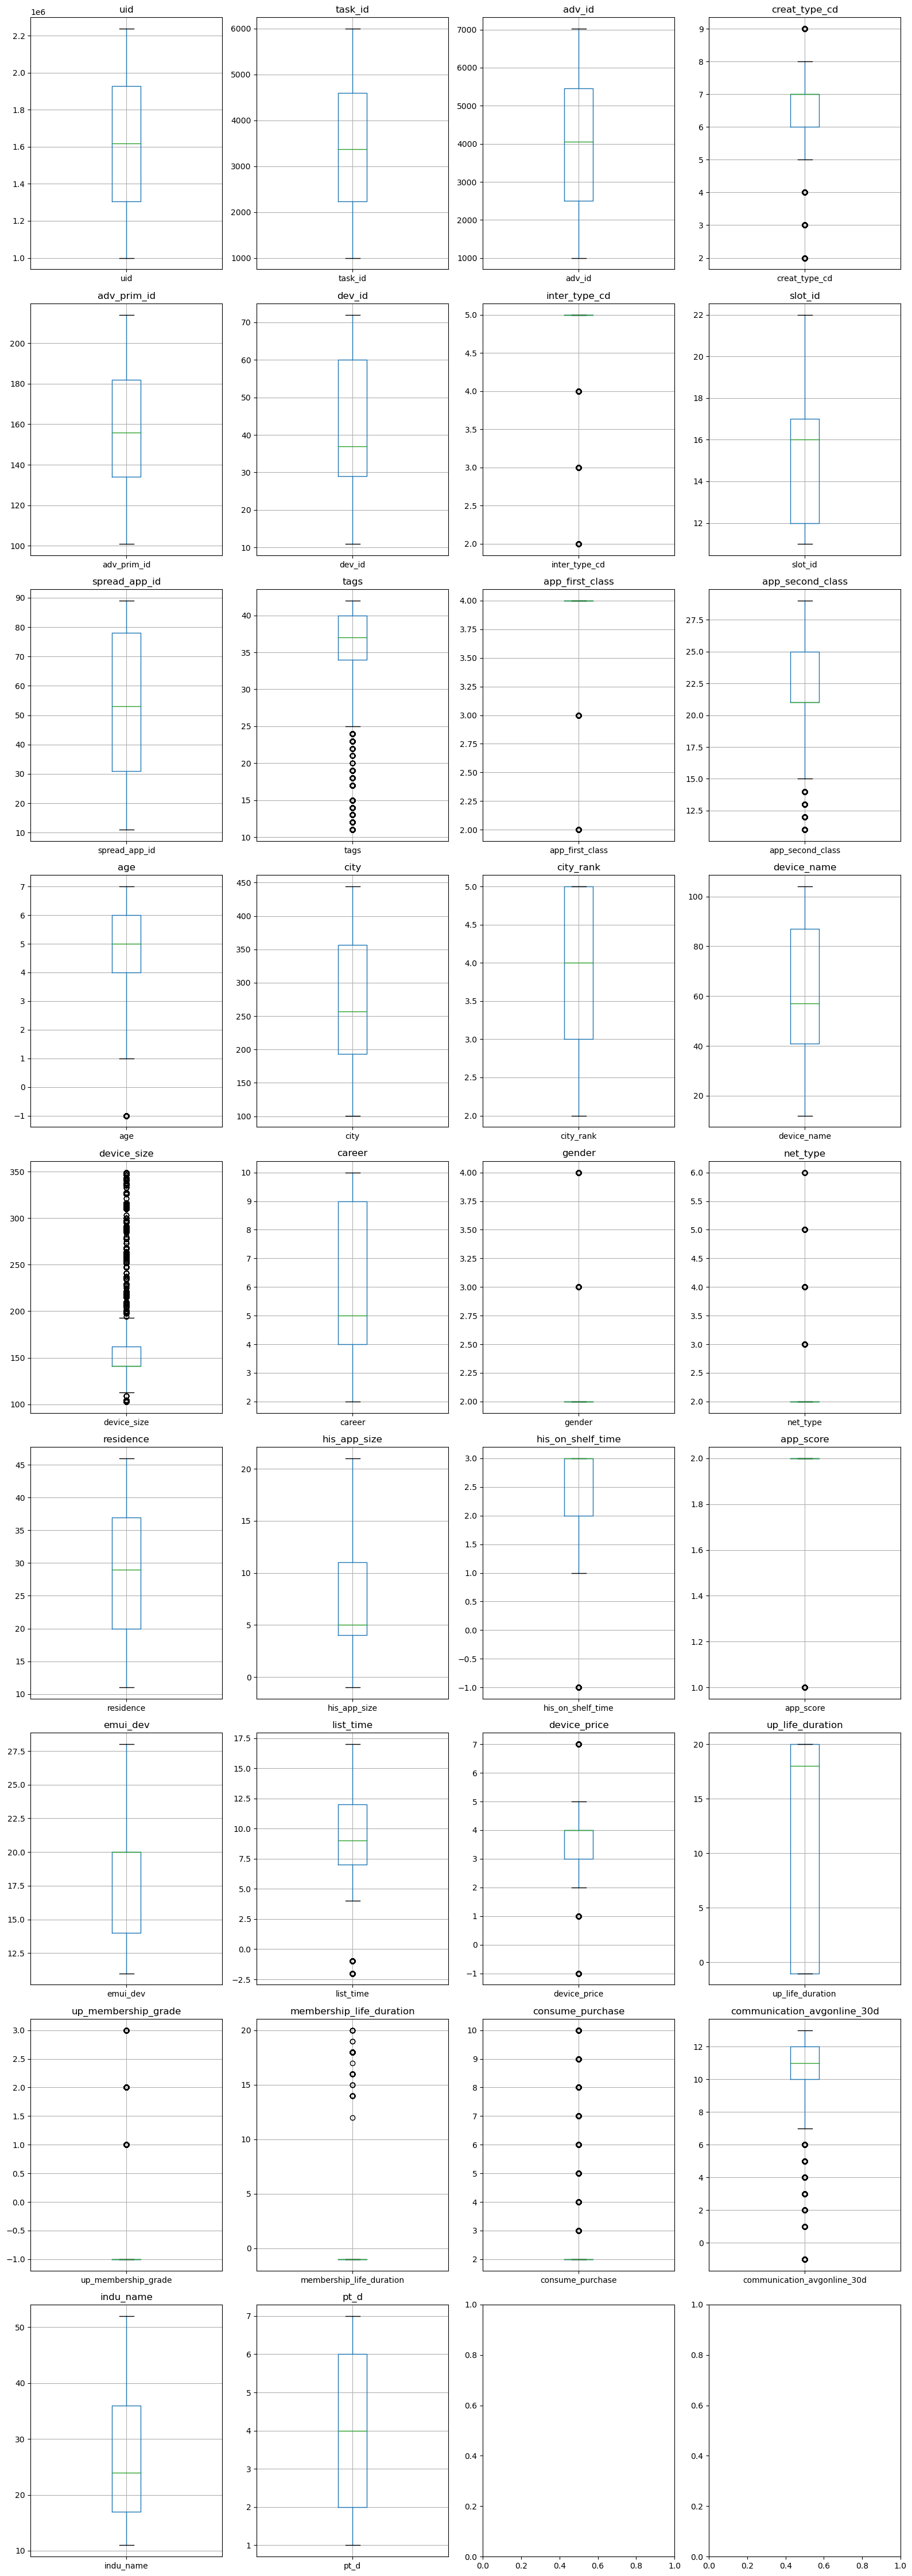

In [13]:
eda_utils.box_plot_for_numerical(train_df_eda, numerical_attr_list)

In [14]:
eda_utils.tukeys_method_for_numerical(train_df_eda, numerical_attr_list)


Implement Tukey's fences to identify outliers based on the Inter Quartile Range (IQR) method:


,Attribute,Outliers Prob Count,Outliers Prob Fraction,Outliers Poss Count,Outliers Poss Fraction
0,uid,0,0.000000,0,0.000000
1,task_id,0,0.000000,0,0.000000
2,adv_id,0,0.000000,0,0.000000
3,creat_type_cd,26619,0.079399,34034,0.101516
4,adv_prim_id,0,0.000000,0,0.000000
5,dev_id,0,0.000000,0,0.000000
6,inter_type_cd,335257,1.000000,335257,1.000000
7,slot_id,0,0.000000,0,0.000000
8,spread_app_id,0,0.000000,0,0.000000
9,tags,16270,0.048530,70726,0.210961


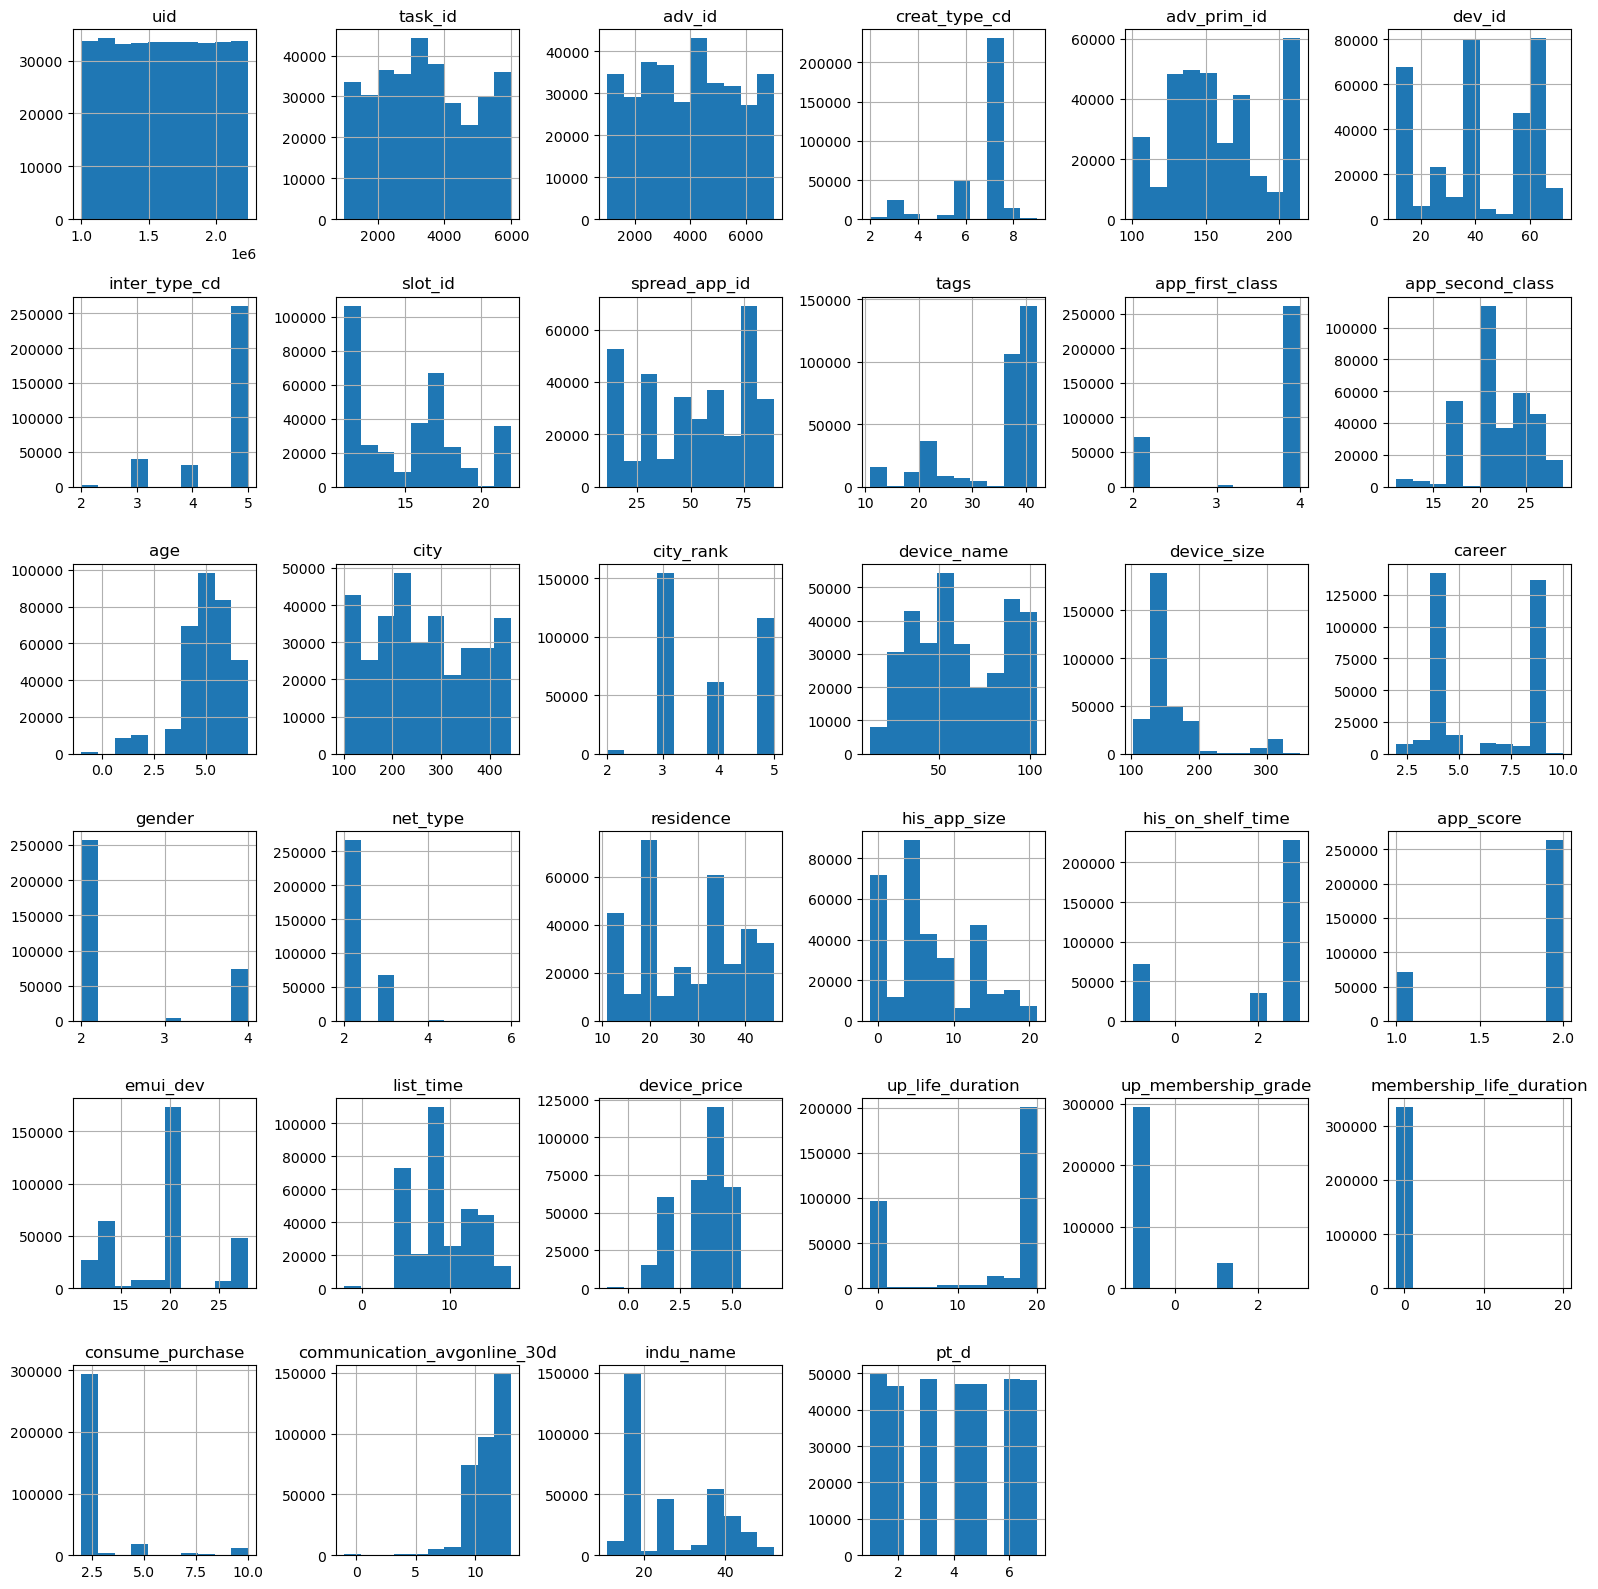

In [15]:
eda_utils.hist_plot_for_numerical(train_df_eda, numerical_attr_list)

#### Cardinality and value counts for categorical attribtues 

In [16]:
cat_num = train_df_eda[nominal_attr_list].value_counts()
cat_num

communication_onlinerate                                     
0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23    85553
6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23                61344
7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23                  33085
5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23              32666
1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23      31516
                                                                 ...  
4^5^15^16^17^18^19^20^21^22                                          1
4^11^12^13^14^15^16^17^18^19^20^21^22^23                             1
4^10^11^12^13^14^15^19^20^21^22^23                                   1
0^5^6^7^17^18^19^20^21^22^23                                         1
9^16^17^18^19^20^21^22^23                                            1
Name: count, Length: 533, dtype: int64

#### Checkout outliers for categorical attribtues

In [18]:
# Calculate the frequency to identify outliers
cat_fre = train_df_eda[nominal_attr_list].value_counts()/train_df_eda[nominal_attr_list].value_counts().sum()
cat_fre

communication_onlinerate                                     
0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23    0.255186
6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23                0.182976
7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23                  0.098685
5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23              0.097436
1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23      0.094005
                                                                   ...   
4^5^15^16^17^18^19^20^21^22                                      0.000003
4^11^12^13^14^15^16^17^18^19^20^21^22^23                         0.000003
4^10^11^12^13^14^15^19^20^21^22^23                               0.000003
0^5^6^7^17^18^19^20^21^22^23                                     0.000003
9^16^17^18^19^20^21^22^23                                        0.000003
Name: count, Length: 533, dtype: float64

#### Correlations and associations between attributes.

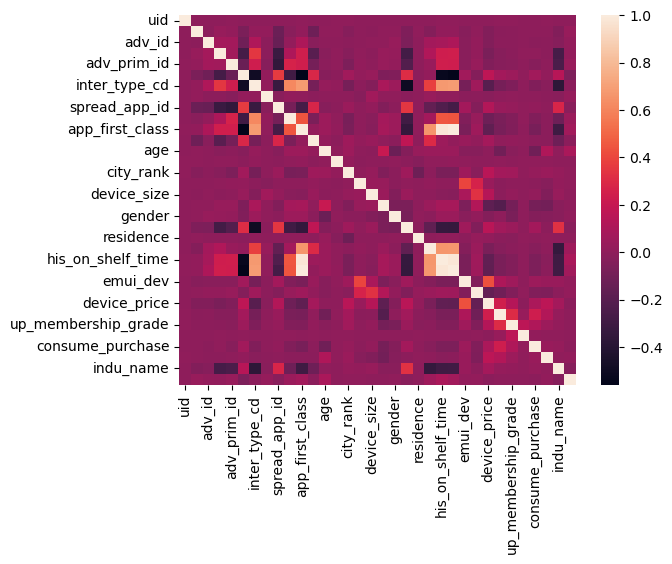

In [19]:
attr_corr = eda_utils.corr_attr(train_df_eda, numerical_attr_list)

In [20]:
attr_corr

,correlation
app_first_class with app_score,0.995796
his_on_shelf_time with app_score,0.980678
app_first_class with his_on_shelf_time,0.979083
inter_type_cd with app_score,0.685372
inter_type_cd with app_first_class,0.682743
...,...
dev_id with inter_type_cd,-0.490404
inter_type_cd with net_type,-0.504449
dev_id with his_on_shelf_time,-0.525456
dev_id with app_score,-0.551466


#### Identify the promising transformations